In [1]:
#installing necessary libraries
from qiskit import *
import numpy as np


In [2]:
#initializing and displaying the pauli array
pauli = np.array([[[1,0],[0,1]], [[1,0],[0,-1]], [[0,1],[1,0]], [[0,-1j],[1j,0]]])
pauli

array([[[ 1.+0.j,  0.+0.j],
        [ 0.+0.j,  1.+0.j]],

       [[ 1.+0.j,  0.+0.j],
        [ 0.+0.j, -1.+0.j]],

       [[ 0.+0.j,  1.+0.j],
        [ 1.+0.j,  0.+0.j]],

       [[ 0.+0.j, -0.-1.j],
        [ 0.+1.j,  0.+0.j]]])

In [3]:
#applying kronecker product
pauli_combinations = []
for i in pauli:
    pauli_combinations.append(np.kron(i, i))

In [4]:
#displaying all the pauli combinations
pauli_combinations

[array([[1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
        [0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j],
        [0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j],
        [0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j]]),
 array([[ 1.+0.j,  0.+0.j,  0.+0.j,  0.+0.j],
        [ 0.+0.j, -1.+0.j,  0.+0.j, -0.+0.j],
        [ 0.+0.j,  0.+0.j, -1.+0.j, -0.+0.j],
        [ 0.+0.j, -0.+0.j, -0.+0.j,  1.-0.j]]),
 array([[0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j],
        [0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j],
        [0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j],
        [1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j]]),
 array([[ 0.+0.j,  0.-0.j,  0.-0.j, -1.+0.j],
        [ 0.+0.j,  0.+0.j,  1.-0.j,  0.-0.j],
        [ 0.+0.j,  1.-0.j,  0.+0.j,  0.-0.j],
        [-1.+0.j,  0.+0.j,  0.+0.j,  0.+0.j]])]

In [5]:
#the decomposition of the matrix in terms of pauli matrices
(-1/2*(pauli_combinations[2] + pauli_combinations[3]) + 1/2*(pauli_combinations[0] + pauli_combinations[1]))

array([[ 1.+0.j,  0.+0.j,  0.+0.j,  0.+0.j],
       [ 0.+0.j,  0.+0.j, -1.+0.j,  0.+0.j],
       [ 0.+0.j, -1.+0.j,  0.+0.j,  0.+0.j],
       [ 0.+0.j,  0.+0.j,  0.+0.j,  1.+0.j]])

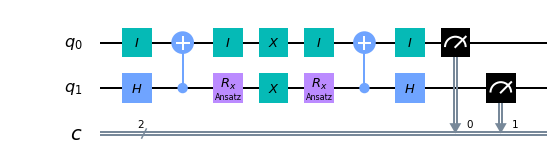

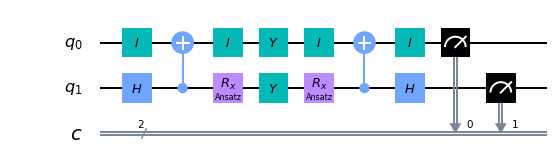

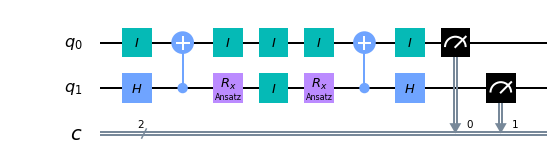

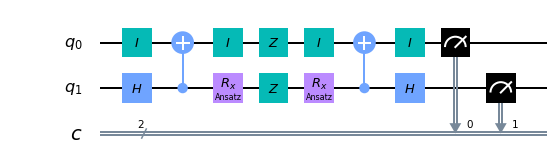

In [7]:
#defining the circuit
qc = [QuantumCircuit(2, 2) for _ in range(4)]
#parameterizing anzatz
param = qiskit.circuit.Parameter('Ansatz')
#anzatz definition
for i in range(4):
    qc[i].h(1)
    qc[i].i(0)
    qc[i].cx(1,0)
    qc[i].rx(param, 1)
    qc[i].i(0)
qc[0].x(0)
qc[0].x(1)

qc[1].y(0)
qc[1].y(1)

qc[2].i(0)
qc[2].i(1)

qc[3].z(0)
qc[3].z(1)
for i in range(4):
    qc[i].rx(param, 1)
    qc[i].i(0)
    qc[i].cx(1,0)
    qc[i].h(1)
    qc[i].i(0)
    qc[i].measure([0,1],[0,1])
    display(qc[i].draw('mpl'))

In [8]:
#running the simulator
import math
num_shots = 1000
sim = Aer.get_backend('qasm_simulator')
output = []
for i in np.linspace(-4*np.pi, 4*np.pi, 70):
    out = []
    for circuit in qc:
        circuit = circuit.assign_parameters({param: i})
        job = execute(circuit, sim, shots = num_shots)
        result = job.result()
        out.append(result.get_counts(circuit))
    output.append(out)
for i in output:
    print(i)

[{'00': 1000}, {'00': 1000}, {'00': 1000}, {'00': 1000}]
[{'00': 862, '01': 138}, {'00': 1000}, {'00': 865, '01': 135}, {'00': 1000}]
[{'00': 549, '01': 451}, {'00': 1000}, {'00': 561, '01': 439}, {'00': 1000}]
[{'00': 205, '01': 795}, {'00': 1000}, {'00': 219, '01': 781}, {'00': 1000}]
[{'00': 15, '01': 985}, {'00': 1000}, {'00': 9, '01': 991}, {'00': 1000}]
[{'00': 70, '01': 930}, {'00': 1000}, {'00': 65, '01': 935}, {'00': 1000}]
[{'00': 335, '01': 665}, {'00': 1000}, {'00': 363, '01': 637}, {'00': 1000}]
[{'00': 668, '01': 332}, {'00': 1000}, {'00': 692, '01': 308}, {'00': 1000}]
[{'00': 952, '01': 48}, {'00': 1000}, {'00': 948, '01': 52}, {'00': 1000}]
[{'00': 982, '01': 18}, {'00': 1000}, {'00': 977, '01': 23}, {'00': 1000}]
[{'00': 768, '01': 232}, {'00': 1000}, {'00': 764, '01': 236}, {'00': 1000}]
[{'00': 429, '01': 571}, {'00': 1000}, {'00': 389, '01': 611}, {'00': 1000}]
[{'00': 116, '01': 884}, {'00': 1000}, {'00': 109, '01': 891}, {'00': 1000}]
[{'00': 1, '01': 999}, {'00'

In [14]:
#function for finding eigenvalue
final = []
for i in output:
    out2 = []
    for j in i:
        if '00' in j.keys():
            out2.append(j['00'])
        else:
            out2.append(0)
    final.append(-1/2*(math.sqrt(out2[0]/num_shots) + math.sqrt(out2[1]/num_shots)) + 1/2*(math.sqrt(out2[2]/num_shots) + (math.sqrt(out2[3]/num_shots))))
print('minimum eigenvalue = ', min(final))

minimum eigenvalue =  -0.023994055813293724
